<a href="https://colab.research.google.com/github/nile649/CUDA_Tutorials/blob/master/cuda_chp_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4 | 1
## Kernels, Threads, Blocks, and Grids


---
The learning outcomes for this chapter are as follows:
1. Understanding the difference between a kernel and a device function
2. How to compile and launch a kernel in PyCUDA and use a device function
within a kernel
3. Effectively using threads, blocks, and grids in the context of launching a kernel
and how to use threadIdx and blockIdx within a kernel
4. How and why to synchronize threads within a kernel, using both
__syncthreads() for synchronizing all threads among a single block and the
host to synchronize all threads among an entire grid of blocks
5. How to use device global and shared memory for intra-thread communication
6. How to use all of our newly acquired knowledge about kernels to properly
implement a GPU version of the parallel prefix sum





In [2]:
!lscpu


Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2200.000
BogoMIPS:            4400.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

Check free memory : !free -g

In [3]:
!free -g

              total        used        free      shared  buff/cache   available
Mem:             12           0          10           0           2          11
Swap:             0           0           0


Check GPu card

In [4]:
!nvidia-smi

Sun Nov  1 05:21:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Querying your GPU

# Installing PyCUDA (Linux)


---
!pip install PyCUDA



In [5]:
!pip install PyCUDA

     |████████████████████████████████| 1.6MB 5.5MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
     |████████████████████████████████| 81kB 12.2MB/s 
  Created wheel for PyCUDA: filename=pycuda-2020.1-cp36-cp36m-linux_x86_64.whl size=621567 sha256=f7ebe150029c6326a5245a71d4d1af7ff8e3ad36f549cacc347c57a6368350f9
  Stored in directory: /root/.cache/pip/wheels/8f/78/d1/5bb826f81d9d490297a348d818ff3ee6dd6f2075b06dde6ea0
  Created wheel for pytools: filename=pytools-2020.4.3-py2.py3-none-any.whl size=61374 sha256=ee998ac06fe77f38102d338526b0ca89e6436730ad8a5fb11352198d370b27e3
  Stored in directory: /root/.cache/pip/wheels/af/c7/81/a22edb90b0b09a880468b2253bb1df8e9f503337ee15432c64
Successfully built PyCUDA pytools


In [6]:
!sudo apt update
!sudo add-apt-repository ppa:graphics-drivers
!sudo apt-key adv --fetch-keys  http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!sudo bash -c 'echo "deb http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64 /" > /etc/apt/sources.list.d/cuda.list'
!sudo bash -c 'echo "deb http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64 /" > /etc/apt/sources.list.d/cuda_learn.list'

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [405 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:

In [7]:
!sudo apt install cuda-10-1
!sudo apt install libcudnn7


Reading package lists... Done
Building dependency tree       
Reading state information... Done
cuda-10-1 is already the newest version (10.1.243-1).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.
W: Target Packages (Packages) is configured multiple times in /etc/apt/sources.list.d/cuda_learn.list:1 and /etc/apt/sources.list.d/nvidia-ml.list:1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libcudnn7-dev
The following held packages will be changed:
  libcudnn7
The following packages will be upgraded:
  libcudnn7 libcudnn7-dev
2 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
W: Target Packages (Packages) is configured multiple times in /etc/apt/sources.list.d/cuda_learn.list:1 and /etc/apt/sources.list.d/nvidia-ml.list:1
E: Held packages were changed and -y was used without --allow-change-held-packages.


code to check GPU specification

# Kernels


---
As in the last chapter, we'll be learning how to write CUDA kernel functions as inline
CUDA C in our Python code and launch them onto our GPU using PyCUDA. In the last
chapter, we used templates provided by PyCUDA to write kernels that fall into particular
design patterns; in contrast, we'll now see how to write our own kernels from the ground
up, so that we can write a versatile variety of kernels that may not fall into any particular
design pattern covered by PyCUDA, and so that we may get a more fine-tuned control over
our kernels. Of course, these gains will come at the expense of greater complexity in
programming; we'll especially have to get an understanding of threads, blocks, and grids
and their role in kernels, as well as how to synchronize the threads in which our kernel is
executing, as well as understand how to exchange data among threads.

---

Let's start simple and try to re-create some of the element-wise operations we saw in the
last chapter, but this time without using the ElementwiseKernel function; we'll now be
using the <b>SourceModule</b> function. This is a very powerful function in PyCUDA that allows
us to build a kernel from scratch, so as usual it's best to start simple.

---

# The PyCUDA SourceModule function
We'll use the SourceModule function from PyCUDA to compile raw inline CUDA C code
into usable kernels that we can launch from Python. We should note that SourceModule
actually compiles code into a CUDA module, this is like a Python module or Windows
DLL, only it contains a collection of compiled CUDA code. This means we'll have to "pull
out" a reference to the kernel we want to use with PyCUDA's get_function, before we
can actually launch it. Let's start with a basic example of how to use a CUDA kernel with
SourceModule.



In [8]:
import pycuda.autoinit
import numpy as np
import pycuda
import pycuda.driver as drv
from pycuda import gpuarray
from pycuda.compiler import SourceModule


In [10]:
ker = SourceModule("""
__global__ void scalar_multiply_kernel(float *outvec, float scalar, float
*vec)
{
int i = threadIdx.x;
outvec[i] = scalar*vec[i];
}
""")

1. we declare a kernel function in CUDA C proper, we precede it with the <b>__global __</b> keyword. This will distinguish the function as a kernel to the compiler.

2. We'll always just
declare this as a void function, because we'll always get our output values by passing a
pointer to some empty chunk of memory that we pass in as a parameter.

3. We can declare the
parameters as we would with any standard C function: first we have outvec, which will be
our output scaled vector, which is of course a floating-point array pointer. Next, we have
scalar, which is represented with a mere float; notice that this is not a pointer! If we
wish to pass simple singleton input values to our kernel, we can always do so without
using pointers. Finally, we have our input vector, vec, which is of course another floatingpoint
array pointer.


---

<i>Let's peer into the kernel before we continue with testing it. We recall that
<b>ElementwiseKernel</b> automatically parallelized over multiple GPU threads by a value, i,
which was set for us by PyCUDA; the identification of each individual thread is given by
the <b><i>threadIdx value</i></b>, which we retrieve as follows: 

int i = threadIdx.x;.</i>


---
<p style="color:red;">threadIdx is used to tell each individual thread its identity.

 This is
usually used to determine an index for what values should be processed
on the input and output data arrays. (This can also be used for assigning
particular threads different tasks than others with standard C control flow
statements such as if or switch.)</p>

In [11]:
scalar_multiply_gpu = ker.get_function("scalar_multiply_kernel")

In [13]:
a_host = np.random.randn(512).astype(np.float32)
b_host = 123
a_device = gpuarray.to_gpu(a_host)
c_device = gpuarray.zeros_like(a_device)

In [14]:
scalar_multiply_gpu( c_device, np.float32(b_host), a_device,
block=(512,1,1), grid=(1,1,1))

In [16]:
print("Does our kernel work correctly? : {}".format(np.allclose(c_device.get() , b_host*a_host) ))

Does our kernel work correctly? : True




---
Now we are starting to remove the training wheels of the PyCUDA kernel templates we
learned in the previous chapter—we can now directly write a kernel in pure CUDA C and
launch it to use a specific number of threads on our GPU. However, we'll have to learn a bit
more about how CUDA structures threads into collections of abstract units known as
blocks and grids before we can continue with kernels.


---



# Threads, blocks, and grids


In [8]:
import pycuda.autoinit
import pycuda.driver as drv
from pycuda import gpuarray
from pycuda.compiler import SourceModule
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

When you execute the kernel, you determine how many threads each block will have (in 3D) and how many blocks there are in a 3D grid. In the following code:

dim3 threads(tX, tY, tZ);
dim3 blocks(gX, gY, gZ);

kernel_function<<<blocks, threads>>>(kernel_parameters);
You are launching the kernel function named kernel_function so that the CUDA runtime launches a 3D grid of blocks of dimensions gXxgYxgZ. Each of those blocks will contain threads organized in a 3D structure of size tXxtYxtZ.

If the size of the 3rd dimension is 0 (i.e. it is a 2D mapping), the picture of the official documentation shows it better:

Official CUDA thread hierarchy
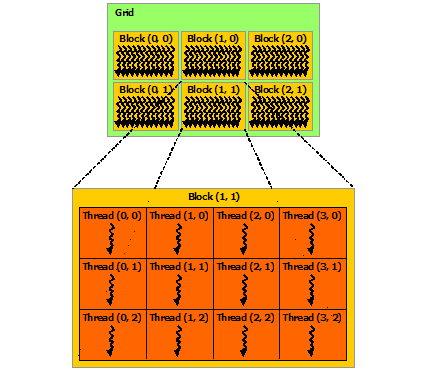

What this means is that the following will be true for every thread executing your kernel:


blockDim.x = tX

blockDim.y = tY

blockDim.z = tZ

gridDim.x = gX

gridDim.y = gY

gridDim.z = gZ

And every thread will have its own coordinates within those parameters. Mathematically:

0 <= threadIdx.x < blockDim.x = tX

0 <= threadIdx.y < blockDim.y = tY

0 <= threadIdx.z < blockDim.z = tZ

0 <= blockIdx.x < gridDim.x = gX

0 <= blockIdx.y < gridDim.y = gY

0 <= blockIdx.z < gridDim.z = gZ


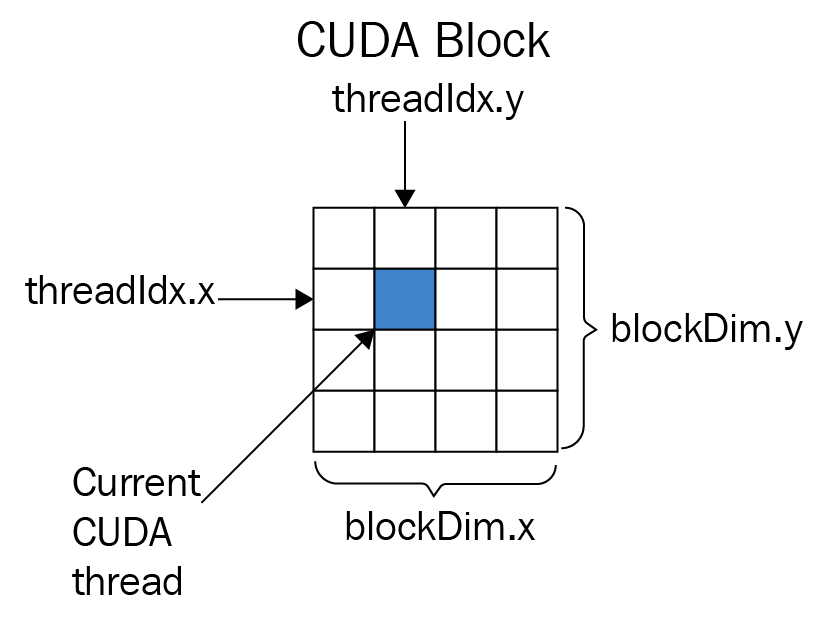

1. Each threadIdx represents 3D lattics inside a block.
2. Block can have maximum of 1024 threads each max size of 32x32.
3. To overcome the limitation we need more Blocks over the grids.
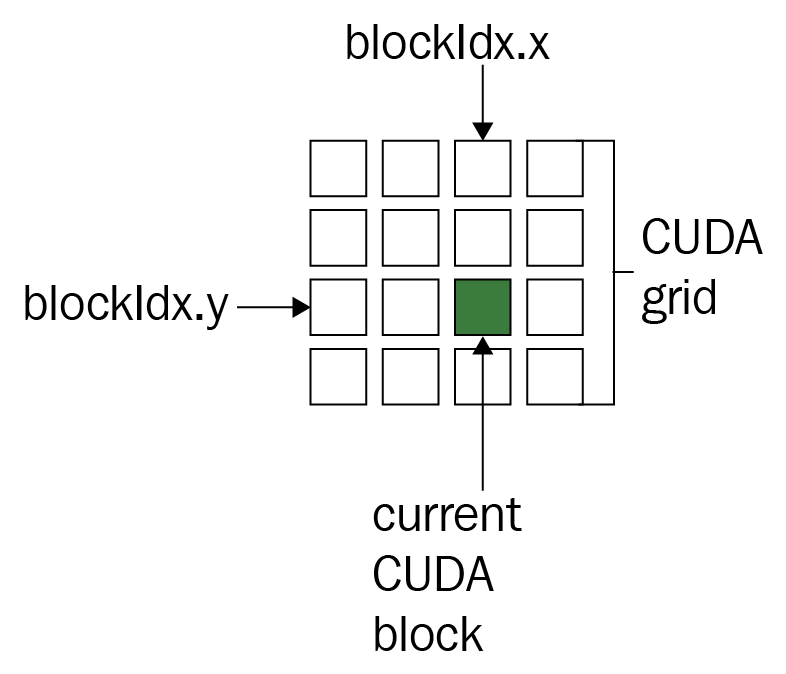

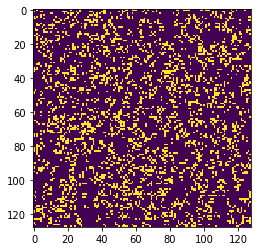

In [14]:
import pycuda.autoinit
import pycuda.driver as drv
from pycuda import gpuarray
from pycuda.compiler import SourceModule
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

ker = SourceModule("""
#define _X  ( threadIdx.x + blockIdx.x * blockDim.x )
#define _Y  ( threadIdx.y + blockIdx.y * blockDim.y )
#define _WIDTH  ( blockDim.x * gridDim.x )
#define _HEIGHT ( blockDim.y * gridDim.y  )
#define _XM(x)  ( (x + _WIDTH) % _WIDTH )
#define _YM(y)  ( (y + _HEIGHT) % _HEIGHT )
#define _INDEX(x,y)  ( _XM(x)  + _YM(y) * _WIDTH )
// return the number of living neighbors for a given cell                
__device__ int nbrs(int x, int y, int * in)
{
     return ( in[ _INDEX(x -1, y+1) ] + in[ _INDEX(x-1, y) ] + in[ _INDEX(x-1, y-1) ] \
                   + in[ _INDEX(x, y+1)] + in[_INDEX(x, y - 1)] \
                   + in[ _INDEX(x+1, y+1) ] + in[ _INDEX(x+1, y) ] + in[ _INDEX(x+1, y-1) ] );
}
__global__ void conway_ker(int * lattice_out, int * lattice  )
{
   // x, y are the appropriate values for the cell covered by this thread
   int x = _X, y = _Y;
   
   // count the number of neighbors around the current cell
   int n = nbrs(x, y, lattice);
                   
    
    // if the current cell is alive, then determine if it lives or dies for the next generation.
    if ( lattice[_INDEX(x,y)] == 1)
       switch(n)
       {
          // if the cell is alive: it remains alive only if it has 2 or 3 neighbors.
          case 3: lattice_out[_INDEX(x,y)] = 1;
                  break;
          default: lattice_out[_INDEX(x,y)] = 0;                   
       }
    else if( lattice[_INDEX(x,y)] == 0 )
         switch(n)
         {
            // a dead cell comes to life only if it has 3 neighbors that are alive.
            case 3: lattice_out[_INDEX(x,y)] = 1;
                    break;
            default: lattice_out[_INDEX(x,y)] = 0;         
         }
         
}
""")


conway_ker = ker.get_function("conway_ker")
     

def update_gpu(frameNum, img, newLattice_gpu, lattice_gpu, N):
    
    conway_ker(newLattice_gpu, lattice_gpu, grid=(N//32,N//32,1), block=(32,32,1)   )
    
    img.set_data(newLattice_gpu.get() )
    
    
    lattice_gpu[:] = newLattice_gpu[:]
    
    return img
    

if __name__ == '__main__':
    # set lattice size
    N = 128
    
    lattice = np.int32( np.random.choice([1,0], N*N, p=[0.25, 0.75]).reshape(N, N) )
    lattice_gpu = gpuarray.to_gpu(lattice)
    
    newLattice_gpu = gpuarray.empty_like(lattice_gpu)        

    fig, ax = plt.subplots()
    img = ax.imshow(lattice_gpu.get(), interpolation='nearest')
    ani = animation.FuncAnimation(fig, update_gpu, fargs=(img, newLattice_gpu, lattice_gpu, N, ) , interval=0, frames=1000, save_count=1000)    
     
    plt.show()

We launch the kernel with the appropriate parameters and set the block and grid sizes as
follows:
conway_ker(newLattice_gpu, lattice_gpu, grid=(N/32,N/32,1),
block=(32,32,1) )
We'll set the block sizes as 32 x 32 with (32, 32, 1); since we are only using two
dimensions for our cell lattice, we can just set the z-dimension as one. Remember that
blocks are limited to 1,024 threads—32 x 32 = 1024, so this will work. (Keep in mind that
there is nothing special here about 32 x 32; we could use values such as 16 x 64 or 10 x 10 if
we wanted to, as long as the total number of threads does not exceed 1,024.)
The number of threads in a CUDA block is limited to a maximum of 1,024.


---




We now look at grid value—here, since we are working with dimensions of 32, it should be
clear that N (in this case) should be divisible by 32. That means that in this case, we are
limited to lattices such as 64 x 64, 96 x 96, 128 x 128, and 1024 x 1024. Again, if we want to
use lattices of a different size, then we'll have to alter the dimensions of the blocks. (If this
doesn't make sense, then please look at the previous diagrams and review how we defined
the width and height macros in our kernel.)

---

